<a href="https://colab.research.google.com/github/celestecastro15/Intro_Deep_Learning/blob/main/Proyecto_Clasificaci%C3%B3n_de_perros_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clasificación de perros por medio de una red neuronal convolucional

### Introducción a Deep Learning
#### Proyecto Final

**Integrantes:**



Cabello Figueroa Israel

Castro Granados Celeste 

Lopez Bahena Ismael Leodan

Pérez Nieto Malinalli

Ríos Orduña Alejandro 

## Importación de librerías generales

In [ ]:
import os,shutil 
from pathlib import Path
import matplotlib.pyplot as plt
from keras.preprocessing import image
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from google.colab import files
from keras import layers
from keras import models
from keras import optimizers


## Importación de Datos

In [ ]:
#Clonado del repositorio en donde subimos el conjunto de imagenes que vamos a utilizar
!git clone https://github.com/celestecastro15/Intro_Deep_Learning 

Cloning into 'Intro_Deep_Learning'...
remote: Enumerating objects: 721, done.
remote: Counting objects: 100% (721/721), done.
remote: Compressing objects: 100% (717/717), done.
remote: Total 721 (delta 15), reused 689 (delta 3), pack-reused 0
Receiving objects: 100% (721/721), 33.58 MiB | 31.12 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [ ]:
#Definición de las rutas de las imágenes
dir='/content/Intro_Deep_Learning/ProyectoFinal/'

original_dataset_dir1 = dir + 'n02085936-Maltese_dog'
original_dataset_dir2 = dir + 'n02110806-basenji'
original_dataset_dir3 = dir + 'n02111500-Great_Pyrenees'

A continuación se crearán y definirán las carpetas en donde se guardarán las imágenes:

In [ ]:
#Creación de las carpetas generales de entrenamiento, validación y prueba
base_dir = '/content/train_dir'
os.mkdir(base_dir)

base_dir = '/content/val_dir'
os.mkdir(base_dir)

base_dir = '/content/test_dir'
os.mkdir(base_dir)

#Definición de las variables asociadas a las carpetas generales de entrenamiento, validación y prueba
train_dir = '/content/train_dir'

val_dir = '/content/val_dir'

test_dir = '/content/test_dir'

In [ ]:
#Creación de las carpetas específicas para el entrenamiento, divididas en las 3 razas de perros que vamos a trabajar 
base_dir = '/content/train_dir/Maltese'
os.mkdir(base_dir)

base_dir = '/content/train_dir/Great_Pyrenees'
os.mkdir(base_dir)

base_dir='/content/train_dir/Basenji'
os.mkdir(base_dir)

#Definición de las variables asociadas a las carpetas de entrenamiento

train_Maltese_dir = '/content/train_dir/Maltese'

train_Great_Pyrenees_dir = '/content/train_dir/Great_Pyrenees'

train_Basenji_dir = '/content/train_dir/Basenji'

In [ ]:
#Creación de las carpetas específicas para validación, divididas en las 3 razas de perros que vamos a trabajar. 
base_dir = '/content/val_dir/Maltese'
os.mkdir(base_dir)

base_dir = '/content/val_dir/Great_Pyrenees'
os.mkdir(base_dir)

base_dir='/content/val_dir/Basenji'
os.mkdir(base_dir)

#Definición de las variables asociadas a las carpetas de validación.

val_Maltese_dir = '/content/val_dir/Maltese'

val_Great_Pyrenees_dir = '/content/val_dir/Great_Pyrenees'

val_Basenji_dir = '/content/val_dir/Basenji'

In [ ]:
#Creación de las carpetas específicas para prueba, divididas en las 3 razas de perros que vamos a trabajar.
base_dir = '/content/test_dir/Maltese'
os.mkdir(base_dir)

base_dir = '/content/test_dir/Great_Pyrenees'
os.mkdir(base_dir)

base_dir='/content/test_dir/Basenji'
os.mkdir(base_dir)

#Definición de las variables asociadas a las carpetas de prueba.

test_Maltese_dir = '/content/test_dir/Maltese'


test_Great_Pyrenees_dir = '/content/test_dir/Great_Pyrenees'


test_Basenji_dir = '/content/test_dir/Basenji'


Y se realizará el llenado de las carpetas anteriores:

In [ ]:
#Imagenes de entrenamiento
Malteses = ['n02085936_({}).jpg'.format(i) for i in range(171)]
for Maltese in Malteses :
    src = os.path.join(original_dataset_dir1, Maltese)
    dst = os.path.join(train_Maltese_dir, Maltese)
    shutil.copyfile(src, dst)

Basenjis = ['n02110806_({}).jpg'.format(i) for i in range(171)]
for Basenji in Basenjis:
    src2 = os.path.join(original_dataset_dir2, Basenji)
    dst2 = os.path.join(train_Basenji_dir, Basenji)
    shutil.copyfile(src2, dst2)

Great_Pyrenees = ['n02111500_({}).jpg'.format(i) for i in range(171)]
for Great_Pyrenees in Great_Pyrenees:
    src1 = os.path.join(original_dataset_dir3, Great_Pyrenees)
    dst1 = os.path.join(train_Great_Pyrenees_dir, Great_Pyrenees)
    shutil.copyfile(src1, dst1)

In [ ]:
#Imagenes de validación
Malteses = ['n02085936_({}).jpg'.format(i) for i in range(171, 190)]
for Maltese in Malteses :
    src = os.path.join(original_dataset_dir1, Maltese)
    dst = os.path.join(val_Maltese_dir, Maltese)
    shutil.copyfile(src, dst)

Basenjis = ['n02110806_({}).jpg'.format(i) for i in range(171, 190)]
for Basenji in Basenjis:
    src2 = os.path.join(original_dataset_dir2, Basenji)
    dst2 = os.path.join(val_Basenji_dir, Basenji)
    shutil.copyfile(src2, dst2)

Great_Pyrenees = ['n02111500_({}).jpg'.format(i) for i in range(171, 190)]
for Great_Pyrenees in Great_Pyrenees:
    src1 = os.path.join(original_dataset_dir3, Great_Pyrenees)
    dst1 = os.path.join(val_Great_Pyrenees_dir, Great_Pyrenees)
    shutil.copyfile(src1, dst1)

In [ ]:
#Imagenes de prueba
Malteses = ['n02085936_({}).jpg'.format(i) for i in range(190, 208)]
for Maltese in Malteses:
    src = os.path.join(original_dataset_dir1, Maltese)
    dst = os.path.join(test_Maltese_dir, Maltese)
    shutil.copyfile(src, dst)

Basenjis = ['n02110806_({}).jpg'.format(i) for i in range(190, 208)]
for Basenji in Basenjis:
    src2 = os.path.join(original_dataset_dir2, Basenji)
    dst2 = os.path.join(test_Basenji_dir, Basenji)
    shutil.copyfile(src2, dst2)   

Great_Pyreneess = ['n02111500_({}).jpg'.format(i) for i in range(190, 208)]
for Great_Pyrenees in Great_Pyreneess:
    src1 = os.path.join(original_dataset_dir3, Great_Pyrenees)
    dst1 = os.path.join(test_Great_Pyrenees_dir, Great_Pyrenees)
    shutil.copyfile(src1, dst1)

## Tratamiento de Datos 

Para realizar el tratamiento y procesado de datos, así como el posterior modelo, se utilizará la librería de `Tensor Flow`, específicamente `keras`, por lo que a continuación se hace la importación pertinente:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Y procedemos a la generación del dataset:

In [ ]:
#Definición del tamaño de las imágenes y tamaño del batch que se va a tomar
image_size = (150, 150)
batch_size = 32

#definición del conjunto de entrenamiento a partir de la carpeta de entrenamiento previamente creada
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "train_dir",
    validation_split=0.1,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

#definición del conjunto de validación a partir de la carpeta de validación previamente creada
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "val_dir",
    validation_split=0.99,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


#definición del conjunto de test a partir de la carpeta de prueba previamente creada
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "test_dir",
    validation_split=0.99,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


Found 513 files belonging to 3 classes.
Using 462 files for training.
Found 57 files belonging to 3 classes.
Using 56 files for validation.
Found 54 files belonging to 3 classes.
Using 53 files for validation.


Vemos que se detectaron un total de 570 imágenes de entrenamiento, de las cuales 456 serán destinadas al training y 114 a la validación. Por otro lado se encontraron 54 imágenes en la carpeta de test, de las cuales se tomarán 53 para hacer la evaluación del modelo. En todos los casos anteriores se identificó un total de 3 clases que corresponden a las 3 razas de perros que se tienen.

A continuación se define explícitamente la variable que contendrá a las etiquetas del conjunto de prueba con el objetivo de facilitar su posterior acceso. 

In [ ]:
#etiquetas del conjunto de test
test_label = np.concatenate([y for x, y in test_ds], axis=0) 

In [ ]:
print(test_label)

[2 0 2 0 2 0 1 0 1 2 2 0 2 0 1 1 1 1 2 0 1 0 1 1 1 1 2 0 1 2 0 2 1 1 2 2 2
 0 0 0 0 2 0 1 2 1 2 0 0 2 0 2 1]


Ahora, como nuestro dataset no es muy grande, es conveniente utilizar data augmentation para ampliar el conjunto de entrenamiento y obtener mejores resultados:

In [ ]:
#Definición del data augmentation en donde se incluirán flip, rotaciones y zoom como variaciones a las imágenes
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
#Definición del nuevo conjunto de entrenamiento ya con el data augmentation
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

Y asegurémonos de usar la captación previa almacenada en el búfer para que podamos obtener datos del disco sin que la Input/Output se bloquee:

In [ ]:
augmented_train_ds = augmented_train_ds.prefetch(buffer_size=32)

## Construcción del modelo

Se utilizará una *red neuronal compuesta de capas convolucionales* como modelo debido a que nuestro *dataset está compuesto de imágenes*:

In [ ]:
#Construcción del modelo

inputs = keras.Input(shape=(150, 150, 3)) #se específica el tamaño de las imágenes de entrada
x = layers.Rescaling(1./255)(inputs) #capa para normalizar los datos, puesto que se encontrarán en un rango de 0 a 255 (RGB)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x) 
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x) #capa que aplasta todos los datos para poder ser ingresados en la capa final (capa densa)

outputs = layers.Dense(3, activation="softmax")(x) #capa final, como esta capa nos dará el resultado, se asignan 3 salidas (tenemos 3 clases)
model = keras.Model(inputs=inputs, outputs=outputs) 

In [ ]:
#Resumen del modelo
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                         

### Entrenamiento del Modelo

In [ ]:
#Compilación del modelo
epochs = 50 #número de épocas

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_network_dogs.keras",
        save_best_only=True,
        monitor="val_loss")
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

#Nota: se utiliza sparse_categorical_crossentropy como función de pérdida debido a que se trata de un problema de clasificación multiclase

In [ ]:
#Entrenamiento del modelo
history= model.fit(
    augmented_train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/50
15/15 [==============================] - 13s 86ms/step - loss: 1.0863 - accuracy: 0.3615 - val_loss: 1.0615 - val_accuracy: 0.3571
Epoch 2/50
15/15 [==============================] - 3s 162ms/step - loss: 0.9966 - accuracy: 0.4870 - val_loss: 1.0135 - val_accuracy: 0.4821
Epoch 3/50
15/15 [==============================] - 3s 164ms/step - loss: 0.9149 - accuracy: 0.5281 - val_loss: 1.0611 - val_accuracy: 0.4821
Epoch 4/50
15/15 [==============================] - 3s 167ms/step - loss: 0.8460 - accuracy: 0.5736 - val_loss: 1.0044 - val_accuracy: 0.5179
Epoch 5/50
15/15 [==============================] - 3s 164ms/step - loss: 0.7614 - accuracy: 0.6602 - val_loss: 1.0317 - val_accuracy: 0.4643
Epoch 6/50
15/15 [==============================] - 3s 168ms/step - loss: 0.8226 - accuracy: 0.5931 - val_loss: 0.9384 - val_accuracy: 0.5536
Epoch 7/50
15/15 [==============================] - 3s 163ms/step - loss: 0.7450 - accuracy: 0.6558 - val_loss: 0.9956 - val_accuracy: 0.5179
Epoch 

Vemos que obtuvimos un accuracy alrededor de 84% y un validation accuracy alrededor de 67%. 

Finalmente se muestran las curvas de las funciones de pérdida y del accuracy durante el entrenamiento:

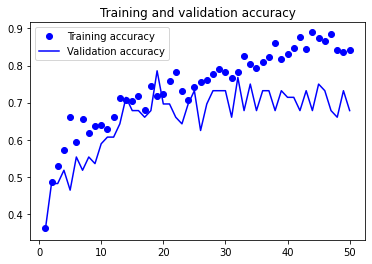

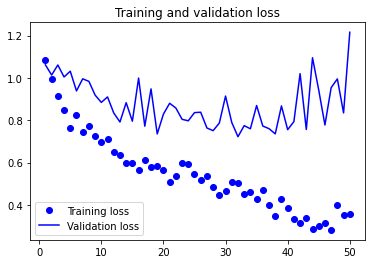

In [ ]:
#Se muestran las curvas correspondientes al training y a la validación
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

En ambos casos vemos que las curvas empiezan a separase aproximadamente en la época 30. 

### Evaluación del Modelo

Para evaluar al modelo se obtendrá el valor del accuracy para el conjunto de prueba, con el fin de observar su comportamiento en imágenes que nunca ha visto:

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print('\nTest accuracy:', test_acc)

2/2 [==============================] - 1s 413ms/step - loss: 0.8672 - accuracy: 0.7547

Test accuracy: 0.7547169923782349


En este caso se obtuvo un accuracy aproximado del 75%.

### Predicción utilizando el Modelo

Finalmente vamos a realizar las predicciones utilizando nuestro modelo y a compararlas con los valores reales:

In [ ]:
#Guardamos en una variable llamada predictions los resultados del método predict aplicado sobre el conjunto de prueba
predictions = model.predict(test_ds)
print(predictions)

[[6.6297459e-03 9.2947578e-01 6.3894555e-02]
 [9.9995434e-01 4.5219269e-05 4.7740667e-07]
 [2.6297721e-01 6.6834968e-01 6.8673089e-02]
 [1.0556727e-04 1.6054478e-01 8.3934963e-01]
 [9.9009633e-01 6.2481402e-03 3.6555808e-03]
 [1.5990801e-02 3.7429902e-01 6.0971022e-01]
 [2.7070483e-04 7.3800367e-01 2.6172563e-01]
 [4.7238540e-02 5.7663742e-02 8.9509773e-01]
 [3.0225329e-04 8.0978818e-02 9.1871899e-01]
 [7.3656432e-02 7.5122249e-01 1.7512105e-01]
 [9.9998868e-01 1.1331058e-05 3.3922973e-09]
 [9.9389523e-01 6.0939258e-03 1.0812272e-05]
 [6.8776792e-01 6.7820162e-02 2.4441189e-01]
 [1.2653610e-01 1.4545536e-01 7.2800857e-01]
 [9.7154069e-01 2.8346423e-02 1.1277626e-04]
 [9.9461561e-01 5.3843092e-03 1.4410757e-07]
 [2.1102121e-02 6.3385791e-01 3.4503996e-01]
 [9.9970019e-01 1.9260978e-04 1.0724101e-04]
 [8.3038676e-06 1.2659474e-01 8.7339699e-01]
 [1.2664417e-02 4.2845926e-01 5.5887634e-01]
 [7.3490798e-01 2.6275474e-01 2.3372828e-03]
 [9.3928945e-01 6.0699329e-02 1.1203039e-05]
 [1.020345

Vemos que nos devuelve las probabilidades de que la imagen corresponda a alguna de las 3 clases, por lo que es necesario utilizar el método `argmax()` para obtener el valor entero máximo y de este modo la clase correspondiente en cada caso.

In [ ]:
predictions_final=[]
for i in range(53):
  predictions_final.append(np.argmax(predictions[i]))

Comparemos ahora sí alguna predicción con su etiqueta real: 

In [ ]:
print(predictions_final[1])
print(test_label[1])

0
0


Vemos que en el caso anterior si coinciden las etiquetas. A continuación mostramos ambos conjuntos de etiquetas completos:

In [ ]:
#etiquetas originales
print(test_label)

#etiquetas predecidas
print(predictions_final)

[2 0 2 0 2 0 1 0 1 2 2 0 2 0 1 1 1 1 2 0 1 0 1 1 1 1 2 0 1 2 0 2 1 1 2 2 2
 0 0 0 0 2 0 1 2 1 2 0 0 2 0 2 1]
[1, 0, 1, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0]


Y para tener una mejor idea de cuantas predicciones fueron correctas, calculamos la matriz de confusión como último paso:

In [ ]:
#Antes de calcular la matriz, es necesario primero convertir la lista "predictions_final" en un arreglo de numpy
predictions_final = np.array(predictions_final)
print(predictions_final)

[1 0 1 2 0 2 1 2 2 1 0 0 0 2 0 0 1 0 2 2 0 0 2 1 0 2 1 1 1 0 1 0 1 1 0 0 2
 2 2 1 0 1 0 1 2 1 1 0 0 1 1 1 0]


In [ ]:
#Cálculo de la matriz de confusión
matriz_confusion = tf.math.confusion_matrix(test_label, predictions_final,num_classes=3)
print(matriz_confusion)

tf.Tensor(
[[7 4 7]
 [6 8 3]
 [7 8 3]], shape=(3, 3), dtype=int32)


Los valores de la diagonal principal *7,8 y 3* corresponden con los valores estimados de forma correcta por el modelo (realizó 18 predicciones correctas). La otra diagonal, por otro lado, representa los casos en los que el modelo se equivocó. 

##Tratamiento de datos modelo 2

In [ ]:
from keras.preprocessing.image import ImageDataGenerator #ImageDataGenerator
#Definimos todas las tranformaciones que queremos aplicar a las imágenes para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=60,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
vertical_flip=True,
channel_shift_range=0.9,
zca_epsilon = 1e-06,
)

#Definimos todas las tranformaciones que queremos aplicar a las imágenes para el conjunto de  validación
val_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
vertical_flip=True,
channel_shift_range=0.9,)

#El conjunto de prueba no necesita de estas tranformaciones por lo que solo normalizamos las imágenes 
test_datagen = ImageDataGenerator(rescale=1./255)

#Aplicamos las tranformaciones al conjunto de entrenamiento dividiendolos en 18 bloques de 30 imágenes de tamaño (150,150,3)
train_generator = train_datagen.flow_from_directory(
"train_dir",
target_size=(150, 150),
batch_size=40,
shuffle=True,
class_mode='categorical')

#Aplicamos las tranformaciones al conjunto de validación dividiendolos en 3 bloques de 19 imágenes de tamaño (150,150,3)
validation_generator = val_datagen.flow_from_directory(
"val_dir",
target_size=(150, 150),
batch_size=19,
shuffle=True,
class_mode='categorical',)

#El conjunto de prueba tendrá imágenes de (150,150,3)
test_generator = test_datagen.flow_from_directory(
"test_dir",
target_size=(150, 150),
batch_size=54,
class_mode='categorical')

Found 513 images belonging to 3 classes.
Found 57 images belonging to 3 classes.
Found 54 images belonging to 3 classes.


(40, 150, 150, 3)
(40, 3)
[0. 1. 0.]


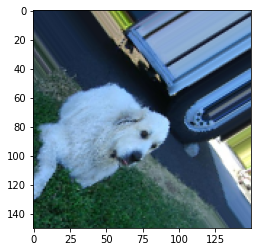

In [ ]:
#Visualizamos una imágenes del conjunto de entrenamiento y su correspondiente etiqueta.
print(train_generator[0][0].shape)
print(train_generator[0][1].shape)
import matplotlib.pyplot as plt 
k=1
plt.imshow(train_generator[0][0][k], cmap=plt.cm.RdYlGn)
print(train_generator [0][1][k])

(19, 150, 150, 3)
(19, 3)
[0. 0. 1.]


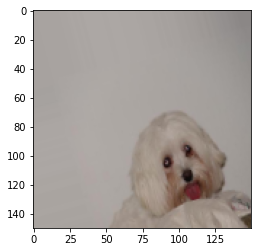

In [ ]:
#Visualizamos una imágenes del conjunto de validación y su correspondiente etiqueta.
print(validation_generator[0][0].shape)
print(validation_generator[0][1].shape)
import matplotlib.pyplot as plt
i=3
plt.imshow(validation_generator [0][0][i], cmap=plt.cm.RdYlGn)
print(validation_generator [0][1][i])

(54, 150, 150, 3)
(54, 3)
[0. 1. 0.]


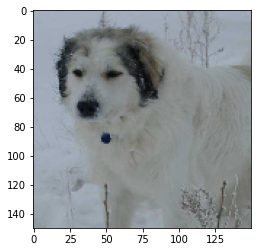

In [ ]:
#Visualizamos una imágenes del conjunto de prueba y su correspondiente etiqueta.
print(test_generator[0][0].shape)
print(test_generator[0][1].shape)
import matplotlib.pyplot as plt
j=0
plt.imshow(test_generator [0][0][j], cmap=plt.cm.RdYlGn)
print(test_generator [0][1][j])

###Construcción modelo 2 

In [ ]:
#Construcción del modelo

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) #se define la capa de entrada y el tamaño de las imágenes 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) #capa que aplasta todos los datos para poder ser ingresados en la capa final (capa densa)
model.add(layers.Dropout(0.3)) #esta capa descartar neuronas al azar, durante cada época para ayudar a que la red no se sobreajuste 
model.add(layers.Dense(712, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))# definimos la capa de salida con 3 clases correspondientes a la raz y una función de activacion softmax



In [ ]:
#Resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 256)       147712    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 256)     

###Entrenamiento modelo 2

In [ ]:
#Compilación del modelo
from keras import optimizers
epochs = 100 #número de épocas 


model.compile(
    optimizer=keras.optimizers.Adam(1e-4), # se utiliza como optimizador Adam con un learning rate de 1e-3
    loss='categorical_crossentropy', #se utiliza sparse_categorical_crossentropy como función de pérdida debido a que se trata de un problema de clasificación multiclase
    metrics=["accuracy"],
)


In [ ]:
#Entrenamiento del modelo
history= model.fit(train_generator, validation_data=validation_generator,epochs=epochs)

Epoch 1/100
13/13 [==============================] - 9s 520ms/step - loss: 1.0982 - accuracy: 0.3431 - val_loss: 1.0770 - val_accuracy: 0.4561
Epoch 2/100
13/13 [==============================] - 6s 450ms/step - loss: 1.0457 - accuracy: 0.4912 - val_loss: 1.0140 - val_accuracy: 0.5263
Epoch 3/100
13/13 [==============================] - 6s 458ms/step - loss: 1.0002 - accuracy: 0.5029 - val_loss: 1.0193 - val_accuracy: 0.4737
Epoch 4/100
13/13 [==============================] - 6s 447ms/step - loss: 0.9721 - accuracy: 0.5029 - val_loss: 0.9642 - val_accuracy: 0.5614
Epoch 5/100
13/13 [==============================] - 6s 447ms/step - loss: 0.9179 - accuracy: 0.5556 - val_loss: 0.9196 - val_accuracy: 0.5263
Epoch 6/100
13/13 [==============================] - 6s 448ms/step - loss: 0.9325 - accuracy: 0.5302 - val_loss: 0.8947 - val_accuracy: 0.5439
Epoch 7/100
13/13 [==============================] - 6s 455ms/step - loss: 0.9047 - accuracy: 0.5673 - val_loss: 0.9604 - val_accuracy: 0.5789

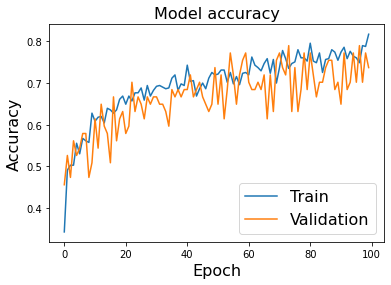

In [ ]:
#Se muestran las curvas correspondientes al accuracy de entrenamiento y  validación
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy', size=16)
plt.ylabel('Accuracy', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='lower right', prop={'size': 16})
plt.show()

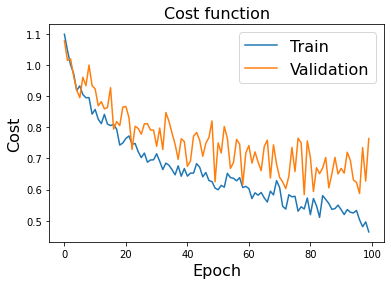

In [ ]:
#Se muestran las curvas correspondientes a la perdida de enetrenamiento y  validación
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cost function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right', prop={'size': 16})
plt.show()

###Evaluación modelo 2


In [ ]:
#se obtendrá el valor del accuracy para el conjunto de prueba
test_loss, test_acc = model.evaluate(test_generator)
print('\nTest accuracy:', test_acc)

1/1 [==============================] - 1s 1s/step - loss: 0.5842 - accuracy: 0.7593

Test accuracy: 0.7592592835426331


In [ ]:
#Guardamos en una variable llamada predictions los resultados del método predict aplicado sobre el conjunto de prueba
predictions = model.predict(test_generator)


In [ ]:
predictions_final=[]
for i in range(53):
  predictions_final.append(np.argmax(predictions[i]))
  

0
[1. 0. 0.]


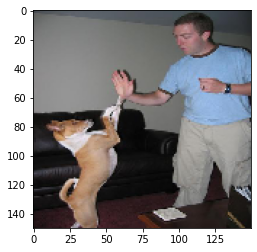

In [ ]:
#visualización de la predicción
import matplotlib.pyplot as plt
j=0
print(predictions_final[j])
plt.imshow(test_generator [0][0][j], cmap=plt.cm.RdYlGn)
print(test_generator [0][1][j])
